# ***Bioinformatics Final Project (1)***

### **Importing the necessary libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import spearmanr

### **EDA & Preprocessing**

In [24]:
clinical_df = pd.read_csv("data_clinical_sample.csv")
clinical_df.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,STAGE_AT_PRESENTATION,PRIMARY_SITE,SAMPLE_TYPE,METASTATIC_SITE,SUB_SITE,PRIMARY_DEPTH,PRIMARY_MITOSES,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-1,VU1,ACRM,IIIB,Plantar Foot,Metastasis,NaN,Inguninal( LN Regional),0.5,<1,Melanoma,Acral Melanoma,Matched,4.200000
1,P-2,VU2,ACRM,IIIA,Plantar Foot,Primary,NaN,Foot,5.5,6,Melanoma,Acral Melanoma,Matched,2.633333
2,P-3,VU3,ACRM,IIIB,Plantar Foot,Metastasis,NaN,Leg( In-Transit),4.0,4,Melanoma,Acral Melanoma,Matched,0.000000
3,P-4,VU4,ACRM,M1c,Plantar Foot,Metastasis,NaN,Mesentery (Distant Met),1.0,2,Melanoma,Acral Melanoma,Matched,8.233333
4,P-5,VU5,ACRM,M1a,Thumb,Metastasis,NaN,Arm (In-Transit),5.5,Unknown,Melanoma,Acral Melanoma,Matched,6.766667


In [25]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PATIENT_ID             38 non-null     object 
 1   SAMPLE_ID              38 non-null     object 
 2   ONCOTREE_CODE          38 non-null     object 
 3   STAGE_AT_PRESENTATION  37 non-null     object 
 4   PRIMARY_SITE           36 non-null     object 
 5   SAMPLE_TYPE            38 non-null     object 
 6   METASTATIC_SITE        11 non-null     object 
 7   SUB_SITE               37 non-null     object 
 8   PRIMARY_DEPTH          34 non-null     float64
 9   PRIMARY_MITOSES        34 non-null     object 
 10  CANCER_TYPE            38 non-null     object 
 11  CANCER_TYPE_DETAILED   38 non-null     object 
 12  SOMATIC_STATUS         37 non-null     object 
 13  TMB_NONSYNONYMOUS      38 non-null     float64
dtypes: float64(2), object(12)
memory usage: 4.3+ KB


In [26]:
clinical_df.isnull().sum()

,0
PATIENT_ID,0
SAMPLE_ID,0
ONCOTREE_CODE,0
STAGE_AT_PRESENTATION,1
PRIMARY_SITE,2
SAMPLE_TYPE,0
METASTATIC_SITE,27
SUB_SITE,1
PRIMARY_DEPTH,4
PRIMARY_MITOSES,4


In [27]:
#Dropping columns that all have the same values because they won't be of benefit
cols_drop = ['ONCOTREE_CODE','CANCER_TYPE',	'CANCER_TYPE_DETAILED']
clinical_df = clinical_df.drop(cols_drop, axis=1)
clinical_df

,PATIENT_ID,SAMPLE_ID,STAGE_AT_PRESENTATION,PRIMARY_SITE,SAMPLE_TYPE,METASTATIC_SITE,SUB_SITE,PRIMARY_DEPTH,PRIMARY_MITOSES,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-1,VU1,IIIB,Plantar Foot,Metastasis,NaN,Inguninal( LN Regional),0.5,<1,Matched,4.200000
1,P-2,VU2,IIIA,Plantar Foot,Primary,NaN,Foot,5.5,6,Matched,2.633333
2,P-3,VU3,IIIB,Plantar Foot,Metastasis,NaN,Leg( In-Transit),4.0,4,Matched,0.000000
3,P-4,VU4,M1c,Plantar Foot,Metastasis,NaN,Mesentery (Distant Met),1.0,2,Matched,8.233333
4,P-5,VU5,M1a,Thumb,Metastasis,NaN,Arm (In-Transit),5.5,Unknown,Matched,6.766667
5,P-6,VU6,IIIC,Plantar Foot,Metastasis,NaN,Pelvic LN (Deep Regional),2.6,1,Matched,1.300000
6,P-7,VU7,IIIB,Subungual Toe,Metastasis,NaN,Chest Wall (Distant Met),5.5,3,Matched,38.833333
7,P-8,VU8,IIIB,Subungual Thumb,Primary,NaN,Thumb,6.0,10,Matched,2.766667
8,P-9,VU9,IIC,Subungual Thumb,Primary,NaN,Thumb,8.0,4,Matched,2.666667
9,P-10,VU10,IIC,Plantar Foot,Primary,NaN,Heel,7.0,13,Matched,2.833333


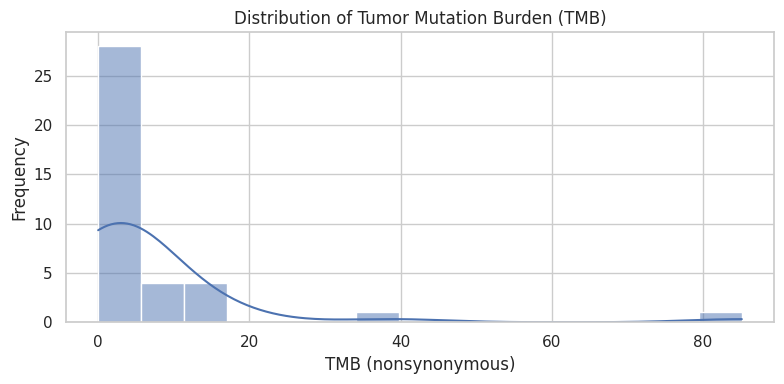

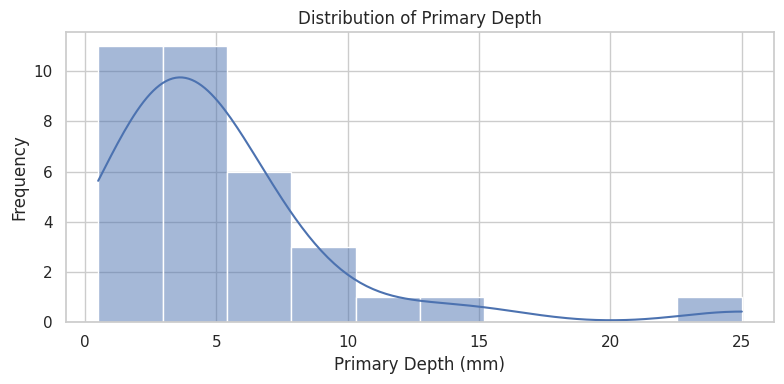

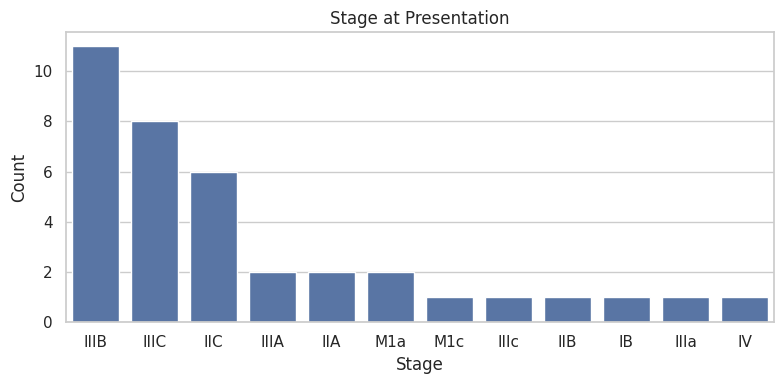

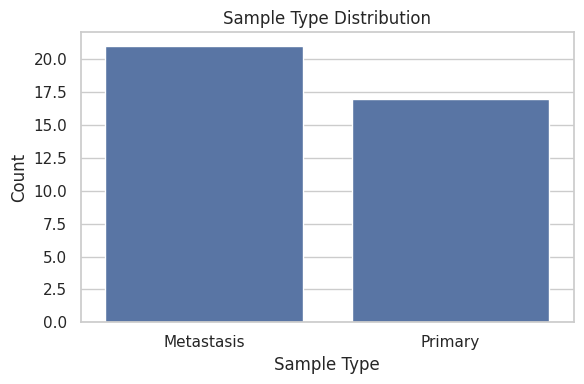

In [28]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of tumor mutation burden
plt.figure(figsize=(8, 4))
sns.histplot(clinical_df["TMB_NONSYNONYMOUS"], kde=True, bins=15)
plt.title("Distribution of Tumor Mutation Burden (TMB)")
plt.xlabel("TMB (nonsynonymous)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot primary depth distribution
plt.figure(figsize=(8, 4))
sns.histplot(clinical_df["PRIMARY_DEPTH"].dropna(), kde=True, bins=10)
plt.title("Distribution of Primary Depth")
plt.xlabel("Primary Depth (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Bar plot: STAGE_AT_PRESENTATION
plt.figure(figsize=(8, 4))
sns.countplot(data=clinical_df, x="STAGE_AT_PRESENTATION", order=clinical_df["STAGE_AT_PRESENTATION"].value_counts().index)
plt.title("Stage at Presentation")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Bar plot: SAMPLE_TYPE
plt.figure(figsize=(6, 4))
sns.countplot(data=clinical_df, x="SAMPLE_TYPE")
plt.title("Sample Type Distribution")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [29]:
# Copy the dataframe to avoid modifying the original
clinical_processed = clinical_df.copy()

# Label Encode categorical variables
label_cols = ['STAGE_AT_PRESENTATION', 'PRIMARY_SITE', 'SAMPLE_TYPE',
              'METASTATIC_SITE', 'SUB_SITE', 'PRIMARY_MITOSES', 'SOMATIC_STATUS']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    clinical_processed[col] = clinical_processed[col].astype(str)  # Ensure string type
    clinical_processed[col] = le.fit_transform(clinical_processed[col])
    label_encoders[col] = le

# Drop non-numeric identifiers (keep them for later merging if needed)
clinical_features = clinical_processed.drop(columns=['PATIENT_ID', 'SAMPLE_ID'])

# Fill any remaining NaNs (shouldn't be many) with column means or medians
clinical_features = clinical_features.fillna(clinical_features.median(numeric_only=True))

# Normalize data
scaler = StandardScaler()
clinical_scaled = scaler.fit_transform(clinical_features)

# Convert back to DataFrame
clinical_scaled_df = pd.DataFrame(clinical_scaled, columns=clinical_features.columns)

clinical_scaled_df.head()


,STAGE_AT_PRESENTATION,PRIMARY_SITE,SAMPLE_TYPE,METASTATIC_SITE,SUB_SITE,PRIMARY_DEPTH,PRIMARY_MITOSES,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,-0.100342,-0.787596,-0.899735,0.581402,-0.251633,-1.033241,1.205589,-0.164399,-0.197239
1,-0.481640,-0.787596,1.111438,0.581402,-1.168542,0.116149,0.600139,-0.164399,-0.304573
2,-0.100342,-0.787596,-0.899735,0.581402,0.141328,-0.228668,0.196506,-0.164399,-0.484984
3,2.187450,-0.787596,-0.899735,0.581402,0.665276,-0.918302,-0.408944,-0.164399,0.079088
4,1.806151,1.429342,-0.899735,0.581402,-1.430516,0.116149,1.407406,-0.164399,-0.021395


### **PCA & T-SNE**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


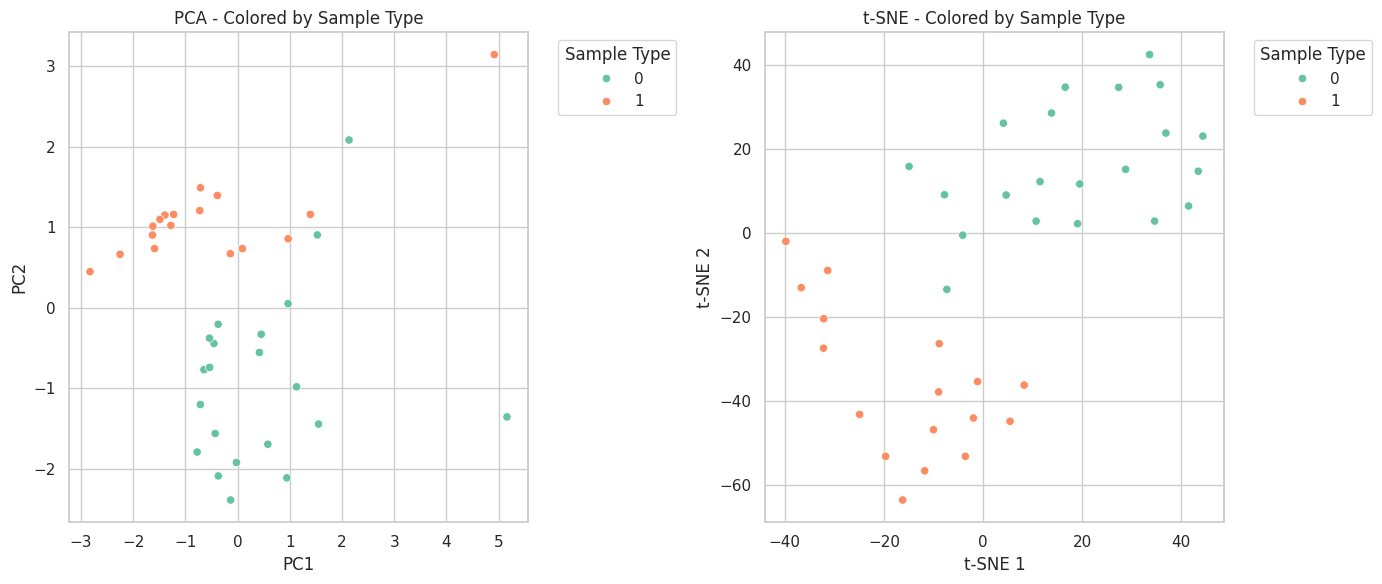

In [30]:
# Get the color labels from the original (unscaled) data
site_labels = clinical_processed['PRIMARY_SITE']
sample_type_labels = clinical_processed['SAMPLE_TYPE']

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clinical_scaled)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
tsne_result = tsne.fit_transform(clinical_scaled)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],
                hue=sample_type_labels, palette="Set2", ax=axes[0])
axes[0].set_title("PCA - Colored by Sample Type")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Sample Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# t-SNE Plot
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=sample_type_labels, palette="Set2", ax=axes[1])
axes[1].set_title("t-SNE - Colored by Sample Type")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].legend(title="Sample Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [31]:
# Add SAMPLE_ID back before saving
clinical_scaled_df["SAMPLE_ID"] = clinical_df["SAMPLE_ID"].values



In [32]:
clinical_scaled_df

,STAGE_AT_PRESENTATION,PRIMARY_SITE,SAMPLE_TYPE,METASTATIC_SITE,SUB_SITE,PRIMARY_DEPTH,PRIMARY_MITOSES,SOMATIC_STATUS,TMB_NONSYNONYMOUS,SAMPLE_ID
0,-0.100342,-0.787596,-0.899735,0.581402,-0.251633,-1.033241,1.205589,-0.164399,-0.197239,VU1
1,-0.481640,-0.787596,1.111438,0.581402,-1.168542,0.116149,0.600139,-0.164399,-0.304573,VU2
2,-0.100342,-0.787596,-0.899735,0.581402,0.141328,-0.228668,0.196506,-0.164399,-0.484984,VU3
3,2.187450,-0.787596,-0.899735,0.581402,0.665276,-0.918302,-0.408944,-0.164399,0.079088,VU4
4,1.806151,1.429342,-0.899735,0.581402,-1.430516,0.116149,1.407406,-0.164399,-0.021395,VU5
5,0.280957,-0.787596,-0.899735,0.581402,1.058237,-0.550497,-1.418028,-0.164399,-0.395920,VU6
6,-0.100342,1.059852,-0.899735,0.581402,-1.299529,0.116149,-0.005311,-0.164399,2.175518,VU7
7,-0.100342,0.690362,1.111438,0.581402,1.189224,0.231088,-1.216211,-0.164399,-0.295438,VU8
8,-0.862939,0.690362,1.111438,0.581402,1.189224,0.690844,0.196506,-0.164399,-0.302289,VU9
9,-0.862939,-0.787596,1.111438,0.581402,-0.644594,0.460966,-1.014394,-0.164399,-0.290870,VU10


In [33]:
clinical_scaled_df.to_csv("clinical_processed.csv")